In [56]:
import pandas as pd
from datetime import datetime
import numpy as np
from pycoingecko import CoinGeckoAPI
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [84]:
cg = CoinGeckoAPI()
gq_price = cg.get_coin_market_chart_by_id(id='outer-ring', vs_currency='usd',  days='15', interval='7d')
high_price = cg.get_coin_market_chart_by_id(id='highstreet', vs_currency='usd',  days='15', interval='7d')

In [85]:
gq_price = gq_price['prices']
gq_price = pd.DataFrame(gq_price, columns=['timeStamp', 'price'])
gq_price['timeStamp'] = pd.to_datetime(gq_price['timeStamp'], unit='ms')
gq_price['timeStamp'] = gq_price['timeStamp'].dt.strftime('%b %d %Y %H:%M:%S')
gq_price

high_price = high_price['prices']
high_price = pd.DataFrame(high_price, columns=['timeStamp', 'price'])
high_price['timeStamp'] = pd.to_datetime(high_price['timeStamp'], unit='ms')
high_price['timeStamp'] = high_price['timeStamp'].dt.strftime('%b %d %Y %H:%M:%S')
high_price

,timeStamp,price
0,Jan 24 2023 16:03:23,1.313708
1,Jan 24 2023 17:02:05,1.279061
2,Jan 24 2023 18:02:56,1.273102
3,Jan 24 2023 19:02:02,1.278840
4,Jan 24 2023 20:02:58,1.275257
...,...,...
361,Feb 08 2023 12:02:08,4.175320
362,Feb 08 2023 13:02:00,4.139898
363,Feb 08 2023 14:02:04,4.088854
364,Feb 08 2023 15:02:58,4.044609


In [86]:
start_time = pd.to_datetime("Jan 29 2023 1:00:00", format='%b %d %Y %H:%M:%S')
end_time = pd.to_datetime("Jan 30 2023 14:00:00", format='%b %d %Y %H:%M:%S')

gq_price['timeStamp'] = pd.to_datetime(gq_price['timeStamp'], format='%b %d %Y %H:%M:%S')
filter_gq = gq_price[(gq_price['timeStamp'] >= start_time) & (gq_price['timeStamp'] <= end_time)]

high_price['timeStamp'] = pd.to_datetime(high_price['timeStamp'], format='%b %d %Y %H:%M:%S')
filter_high = high_price[(high_price['timeStamp'] >= start_time) & (high_price['timeStamp'] <= end_time)]


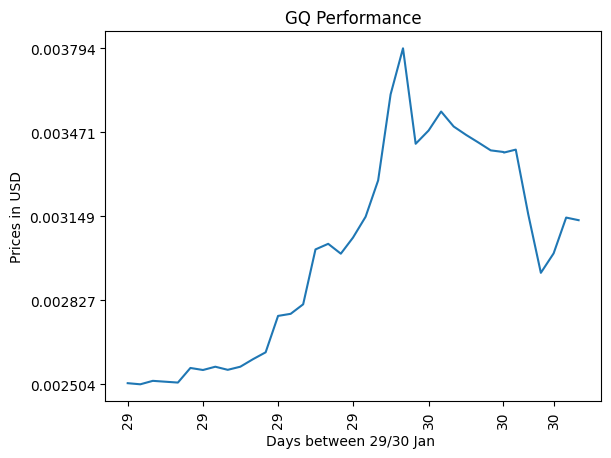

In [93]:

x = filter_gq['timeStamp'].apply(lambda x: mdates.date2num(x))

color = 'tab:blue'
plt.plot(x, filter_gq['price'], color=color)


price_data_min = filter_gq['price'].min()
price_data_max = filter_gq['price'].max()
yticks_values = np.linspace(price_data_min, price_data_max, 5)


plt.yticks(yticks_values)
plt.ylabel('Prices in USD')


plt.xticks(filter_gq['timeStamp'][::6], rotation=90)
xfmt = mdates.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(xfmt)
plt.xlabel('Days between 29/30 Jan ')


plt.title('GQ Performance')
plt.show()




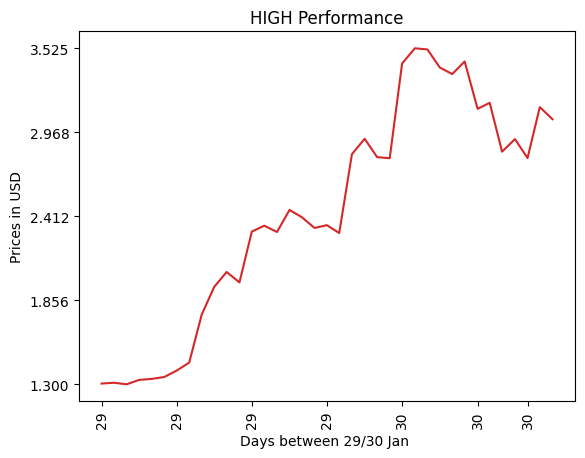

In [94]:

x = filter_high['timeStamp'].apply(lambda x: mdates.date2num(x))

color = 'tab:red'
plt.plot(x, filter_high['price'], color=color)


price_data_min = filter_high['price'].min()
price_data_max = filter_high['price'].max()
yticks_values = np.linspace(price_data_min, price_data_max, 5)


plt.yticks(yticks_values)
plt.ylabel('Prices in USD')


plt.xticks(filter_high['timeStamp'][::6], rotation=90)
xfmt = mdates.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(xfmt)
plt.xlabel('Days between 29/30 Jan ')


plt.title('HIGH Performance')
plt.show()




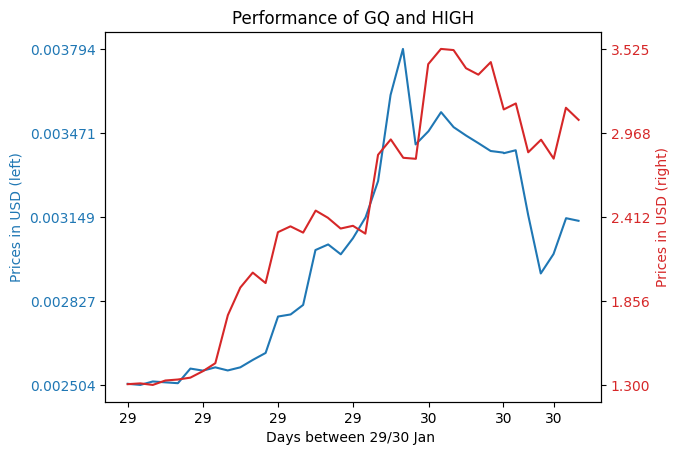

In [97]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

x = filter_gq['timeStamp'].apply(lambda x: mdates.date2num(x))

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.plot(x, filter_gq['price'], color=color)
ax1.set_xlabel('Days between 29/30 Jan ')
ax1.set_ylabel('Prices in USD (left)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

price_data_min = filter_gq['price'].min()
price_data_max = filter_gq['price'].max()
yticks_values = np.linspace(price_data_min, price_data_max, 5)
ax1.set_yticks(yticks_values)

ax2 = ax1.twinx()
x = filter_high['timeStamp'].apply(lambda x: mdates.date2num(x))
color = 'tab:red'
ax2.plot(x, filter_high['price'], color=color)
ax2.set_ylabel('Prices in USD (right)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

price_data_min = filter_high['price'].min()
price_data_max = filter_high['price'].max()
yticks_values = np.linspace(price_data_min, price_data_max, 5)
ax2.set_yticks(yticks_values)

plt.xticks(filter_gq['timeStamp'][::6], rotation=90)
xfmt = mdates.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(xfmt)

plt.title('Performance of GQ and HIGH')
plt.show()
